In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('student.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [3]:
df = df[df['age'] == 16]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,6,12,12
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,13,12
15,GP,F,16,U,GT3,T,4,4,health,other,...,no,4,4,4,1,2,2,6,17,17
16,GP,F,16,U,GT3,T,4,4,services,services,...,no,3,2,3,1,2,2,10,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MS,F,16,R,LE3,T,2,2,other,services,...,yes,5,4,3,1,1,1,0,11,13
564,MS,M,16,R,GT3,T,3,2,services,other,...,no,4,5,5,2,3,5,2,11,9
565,MS,M,16,R,LE3,T,1,1,at_home,other,...,no,4,5,5,2,4,5,0,10,10
570,MS,M,16,R,GT3,T,2,2,services,services,...,yes,5,4,3,2,4,4,6,7,8


In [4]:
### Dalc, Walc에 따른 veryLow, Low, other 열 추가

def classify_Alc(row):
    
    if row['Dalc'] <= 2 and row['Walc'] <= 2:
        if row['Dalc'] == 1 and row['Walc'] == 1:
            return 'Very Low'
        else:
            return 'Low'
    else:
        return 'Other'

df['classify_Alc'] = df.apply(classify_Alc, axis = 1)

C:\Users\Daylight\AppData\Local\Temp\ipykernel_22324\2864531220.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classify_Alc'] = df.apply(classify_Alc, axis = 1)


In [7]:
columns = df.columns

def set_grouped(df_, col):
    grouped = df_.groupby([col, 'classify_Alc']).size().unstack()
    grouped_ratio = grouped.div(grouped.sum(axis = 1), axis = 0)
    return grouped_ratio

def draw_barplot(groupRatio, a, b):
    groupRatio.plot.bar(stacked = True, ax = axes[a, b])

def setTitle(location, col):
    location.set_title(col)
    
def draw_countplot()

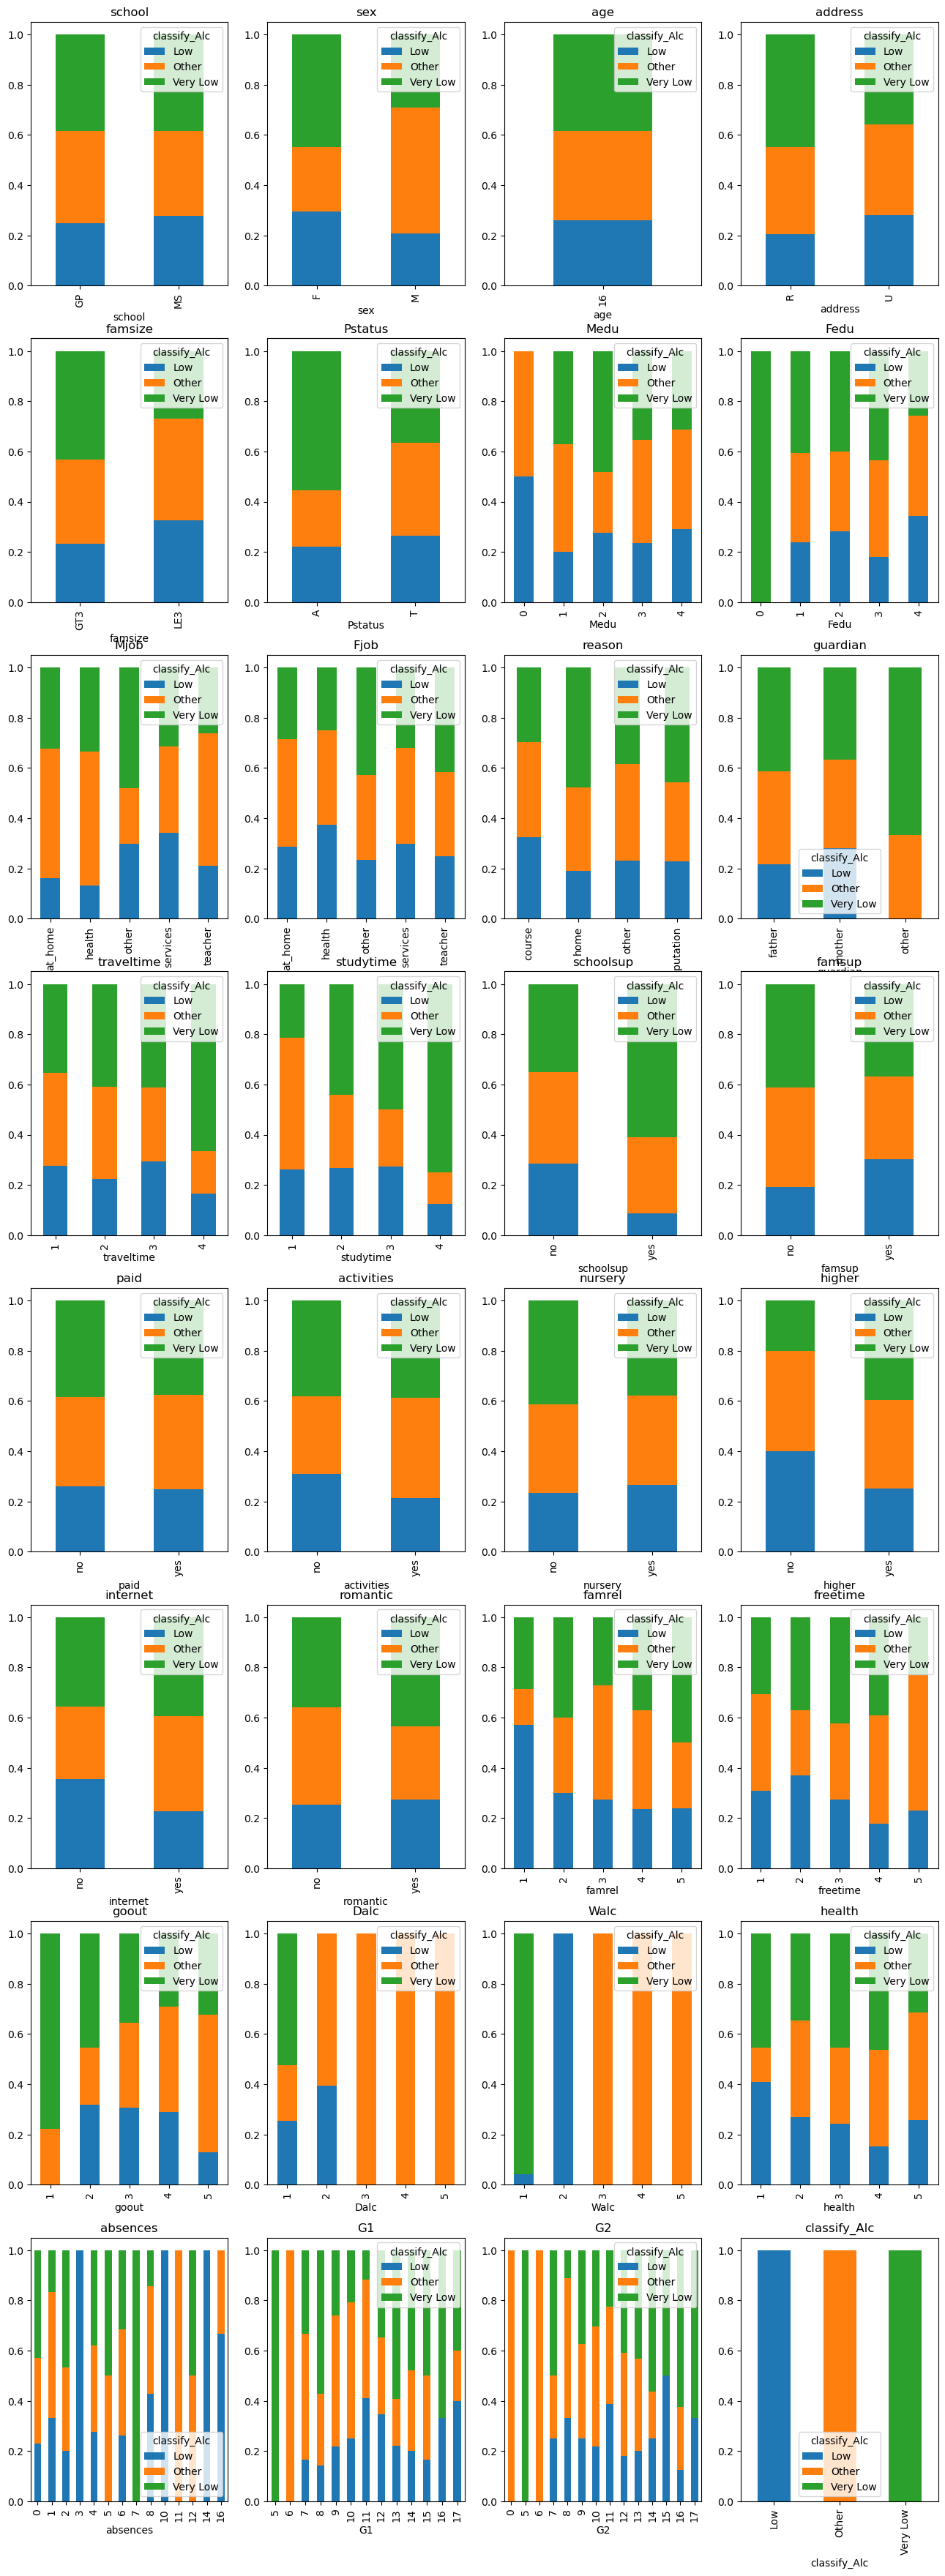

In [10]:
fig, axes = plt.subplots(8, 4, figsize = (16, 44))

for i in range(8):
    for j in range(4):
        return_group_ratio = set_grouped(df, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

In [21]:
df2 = df.copy()
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,classify_Alc
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,Low
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,Low
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,Very Low
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,6,17,17,Low
16,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,10,13,13,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,MS,F,16,R,LE3,T,2,2,other,services,...,5,4,3,1,1,1,0,11,13,Very Low
564,MS,M,16,R,GT3,T,3,2,services,other,...,4,5,5,2,3,5,2,11,9,Other
565,MS,M,16,R,LE3,T,1,1,at_home,other,...,4,5,5,2,4,5,0,10,10,Other
570,MS,M,16,R,GT3,T,2,2,services,services,...,5,4,3,2,4,4,6,7,8,Other


In [26]:
df2_gradeUP = df2[df2['G1'] - df2['G2'] < 0]
df2_gradeDOWN = df2[df2['G1'] - df2['G2'] > 0]

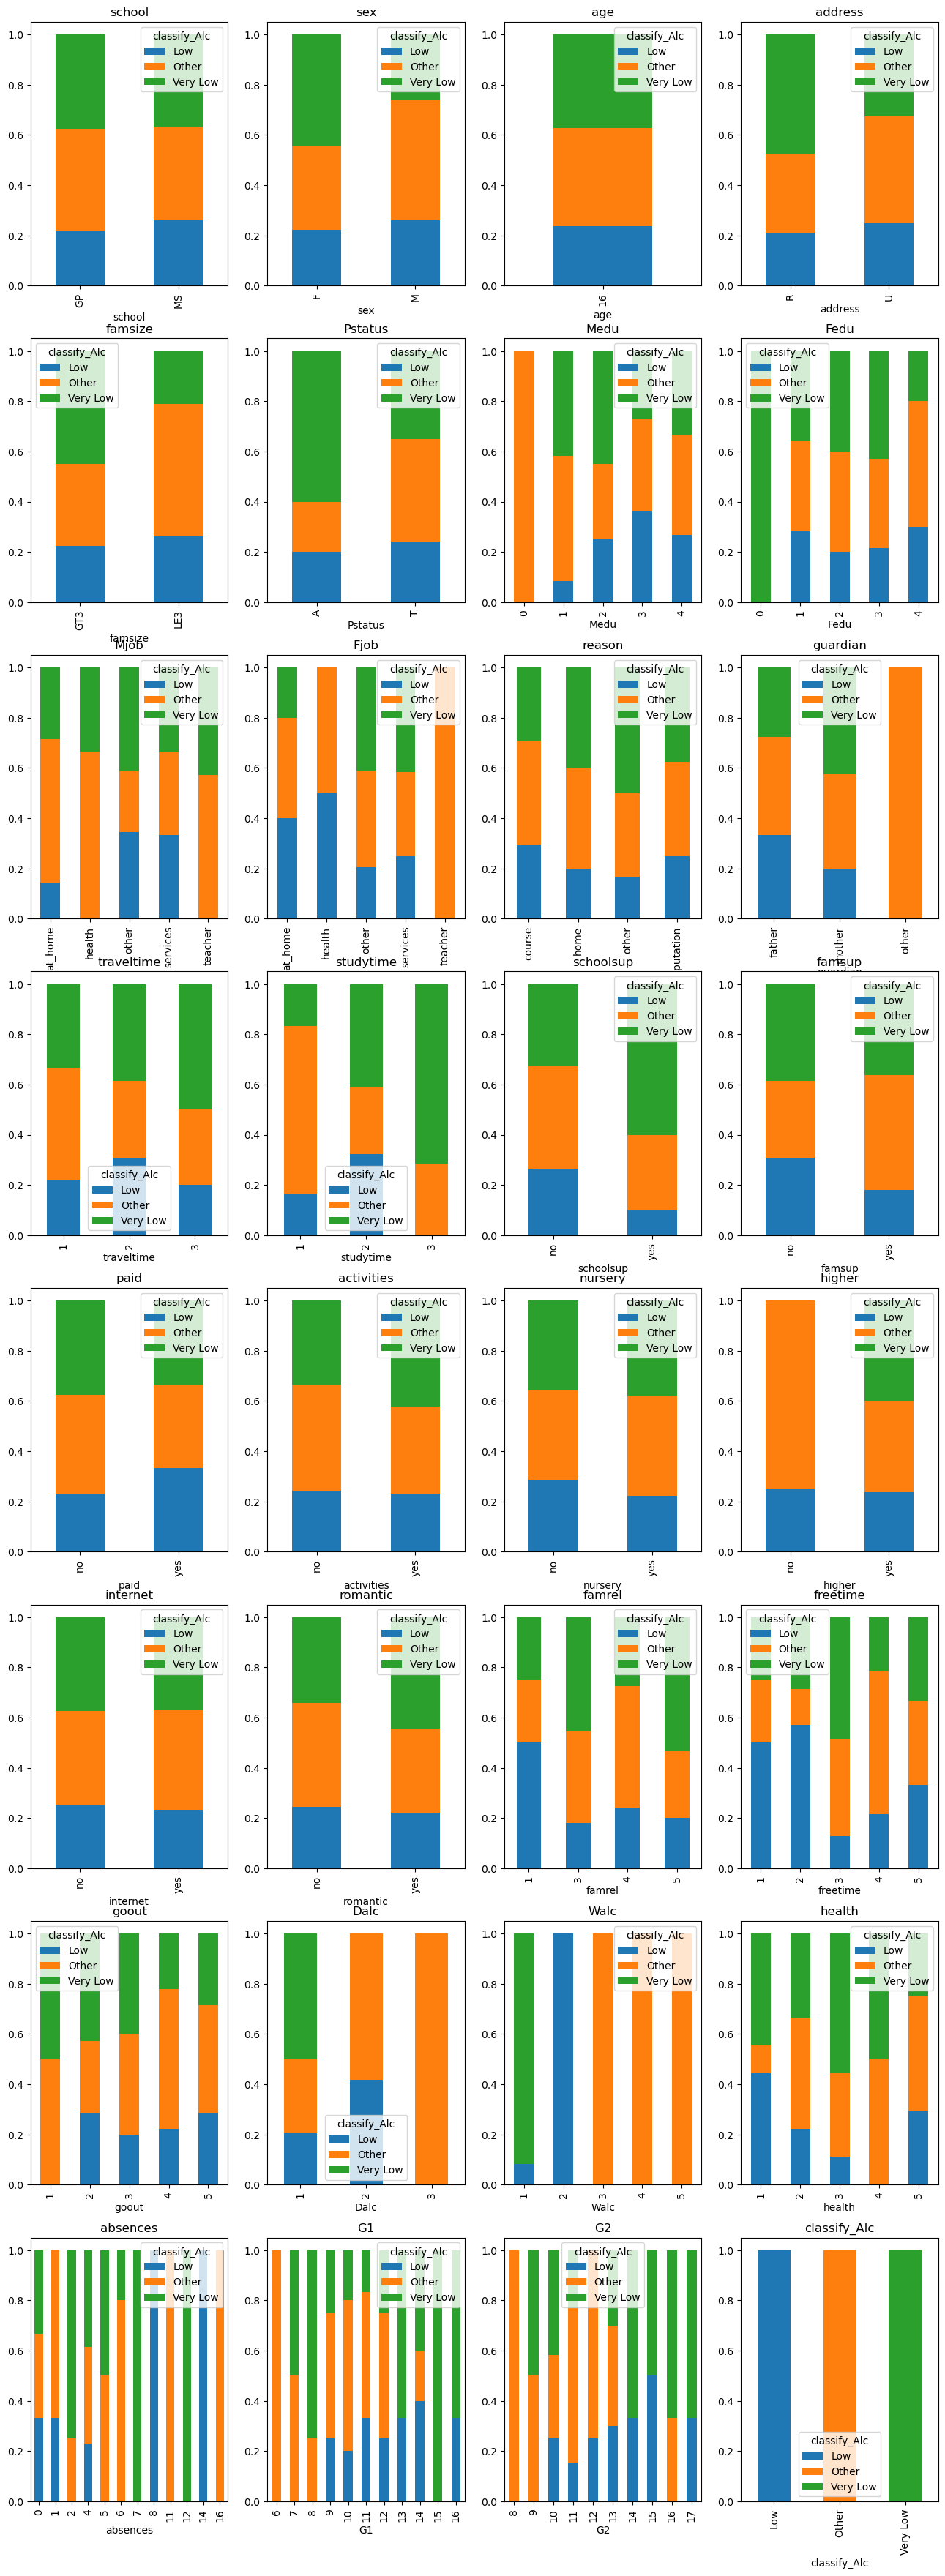

In [27]:
fig, axes = plt.subplots(8, 4, figsize = (16, 44))

for i in range(8):
    for j in range(4):
        return_group_ratio = set_grouped(df2_gradeUP, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

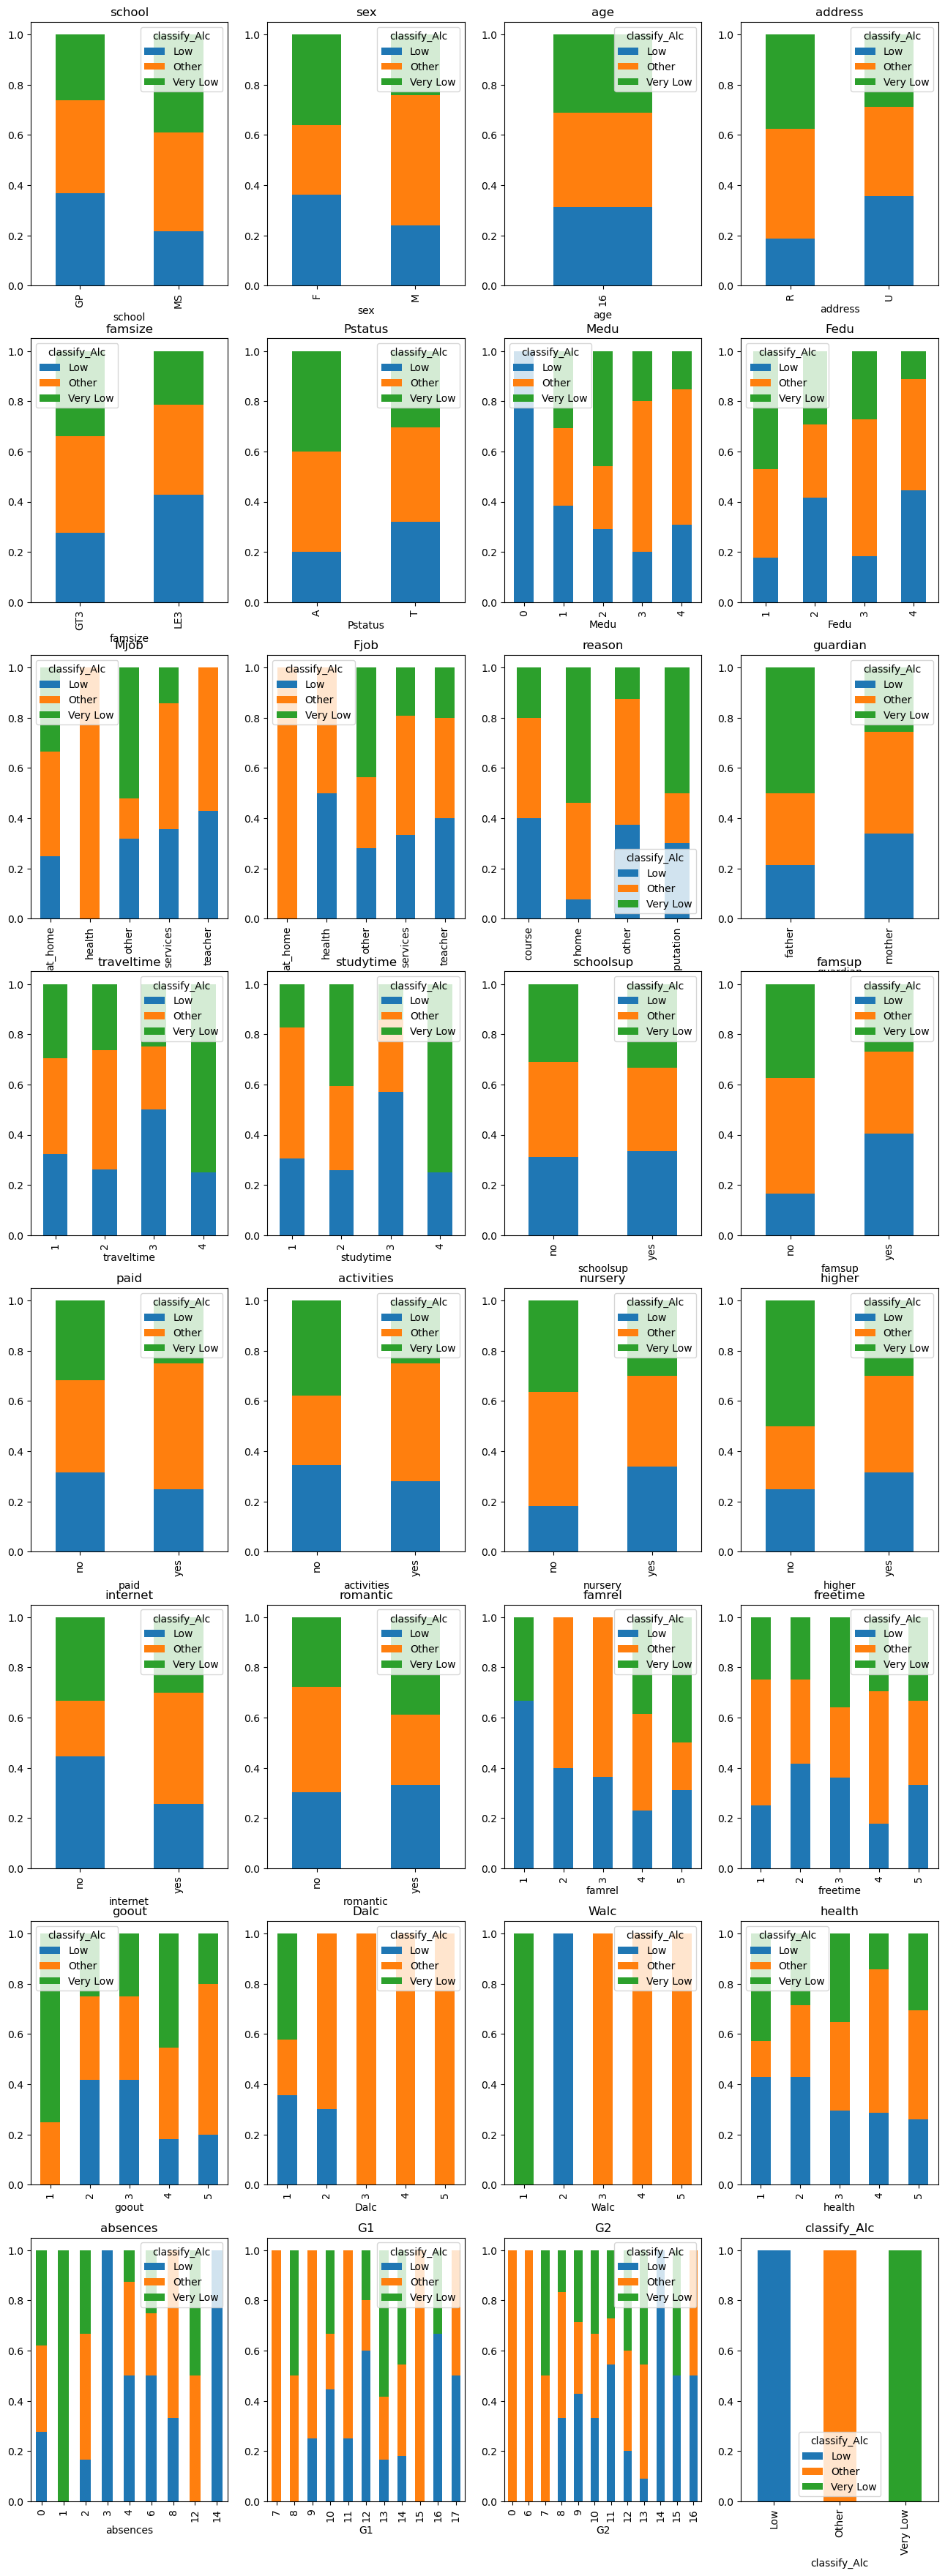

In [28]:
fig, axes = plt.subplots(8, 4, figsize = (16, 44))

for i in range(8):
    for j in range(4):
        return_group_ratio = set_grouped(df2_gradeDOWN, columns[i*4 + j])
        setTitle(axes[i, j], columns[i*4 + j])
        draw_barplot(return_group_ratio, i, j)

In [31]:
print(len(df2_gradeUP), len(df2_gradeDOWN))

59 61


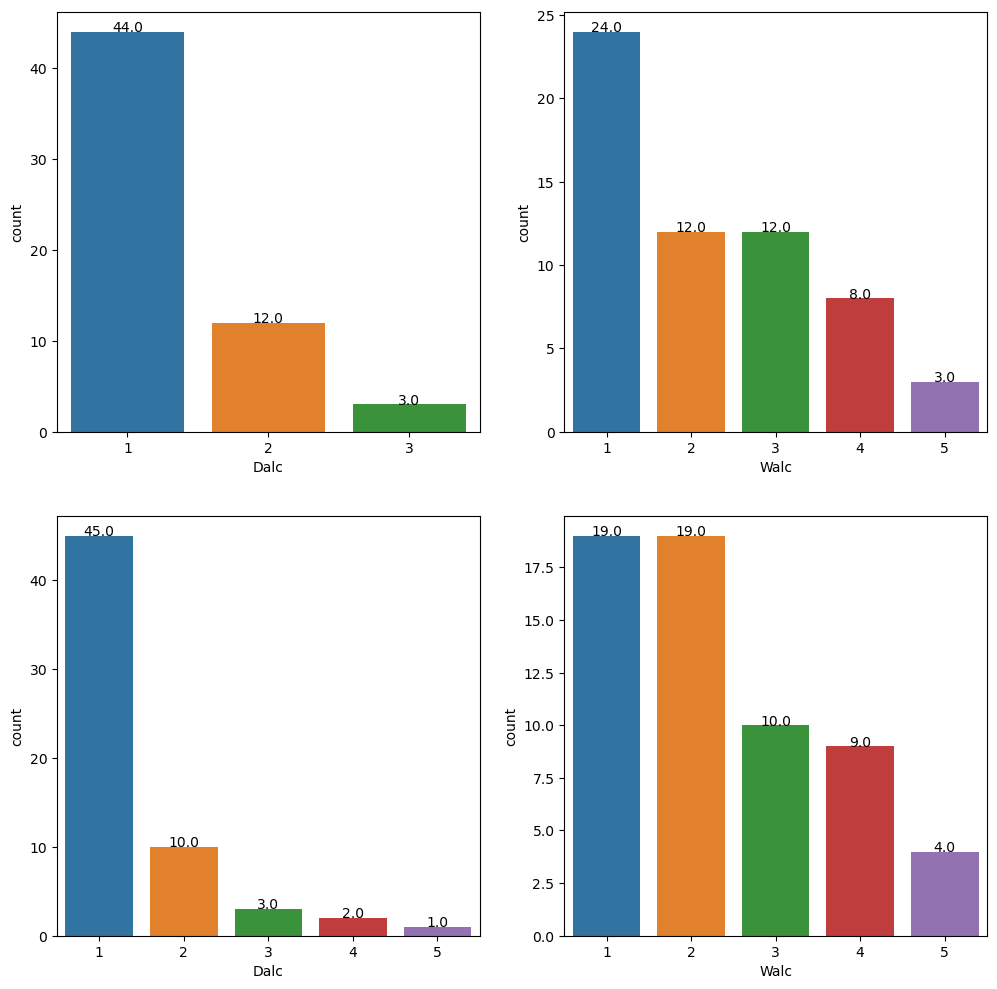

In [38]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))

g_list = []

g1 = sns.countplot(x='Dalc', data=df2_gradeUP, ax=axes[0, 0])
g2 = sns.countplot(x='Walc', data=df2_gradeUP, ax=axes[0, 1])
g3 = sns.countplot(x='Dalc', data=df2_gradeDOWN, ax=axes[1, 0])
g4 = sns.countplot(x='Walc', data=df2_gradeDOWN, ax=axes[1, 1])

for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')

for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')
    
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')
    
for p in g4.patches:
    height = p.get_height()
    g4.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')

(0.0, 20.0)

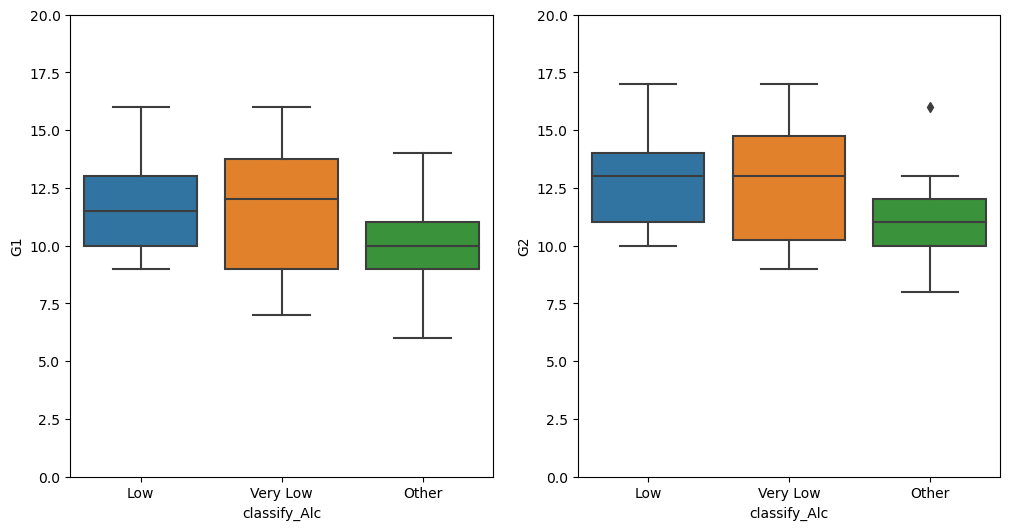

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(x = 'classify_Alc', y = 'G1', data = df2_gradeUP, ax = axes[0])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df2_gradeUP, ax = axes[1])
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 20)

(0.0, 20.0)

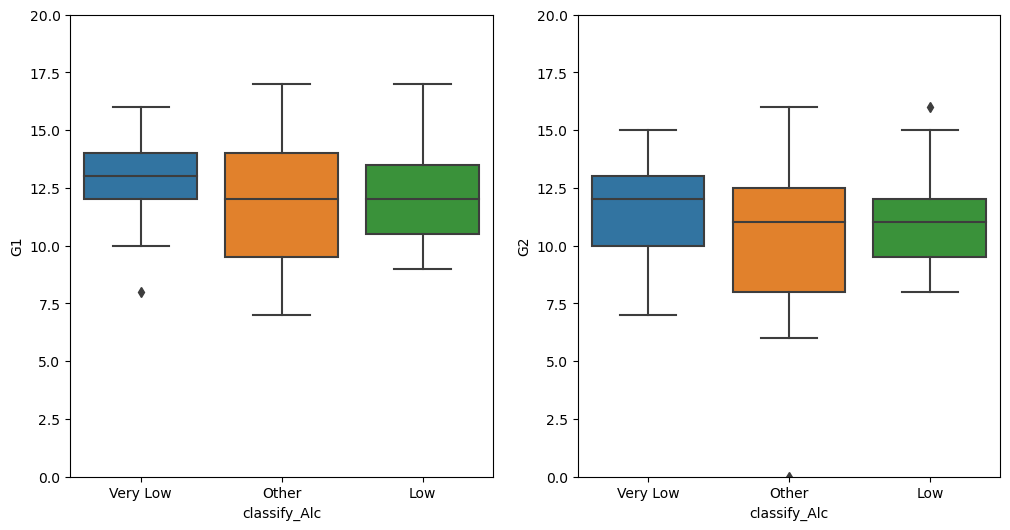

In [47]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(x = 'classify_Alc', y = 'G1', data = df2_gradeDOWN, ax = axes[0])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df2_gradeDOWN, ax = axes[1])

axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 20)

In [51]:
df_GP_M = df[(df['school'] == 'GP') & (df['sex'] == 'M')]    # 53개
df_GP_F = df[(df['school'] == 'GP') & (df['sex'] == 'F')]    # 59개
df_MS_M = df[(df['school'] == 'MS') & (df['sex'] == 'M')]    # 19개
df_MS_F = df[(df['school'] == 'MS') & (df['sex'] == 'F')]    # 46개

Text(0.5, 1.0, "G2 score of MS school's female students")

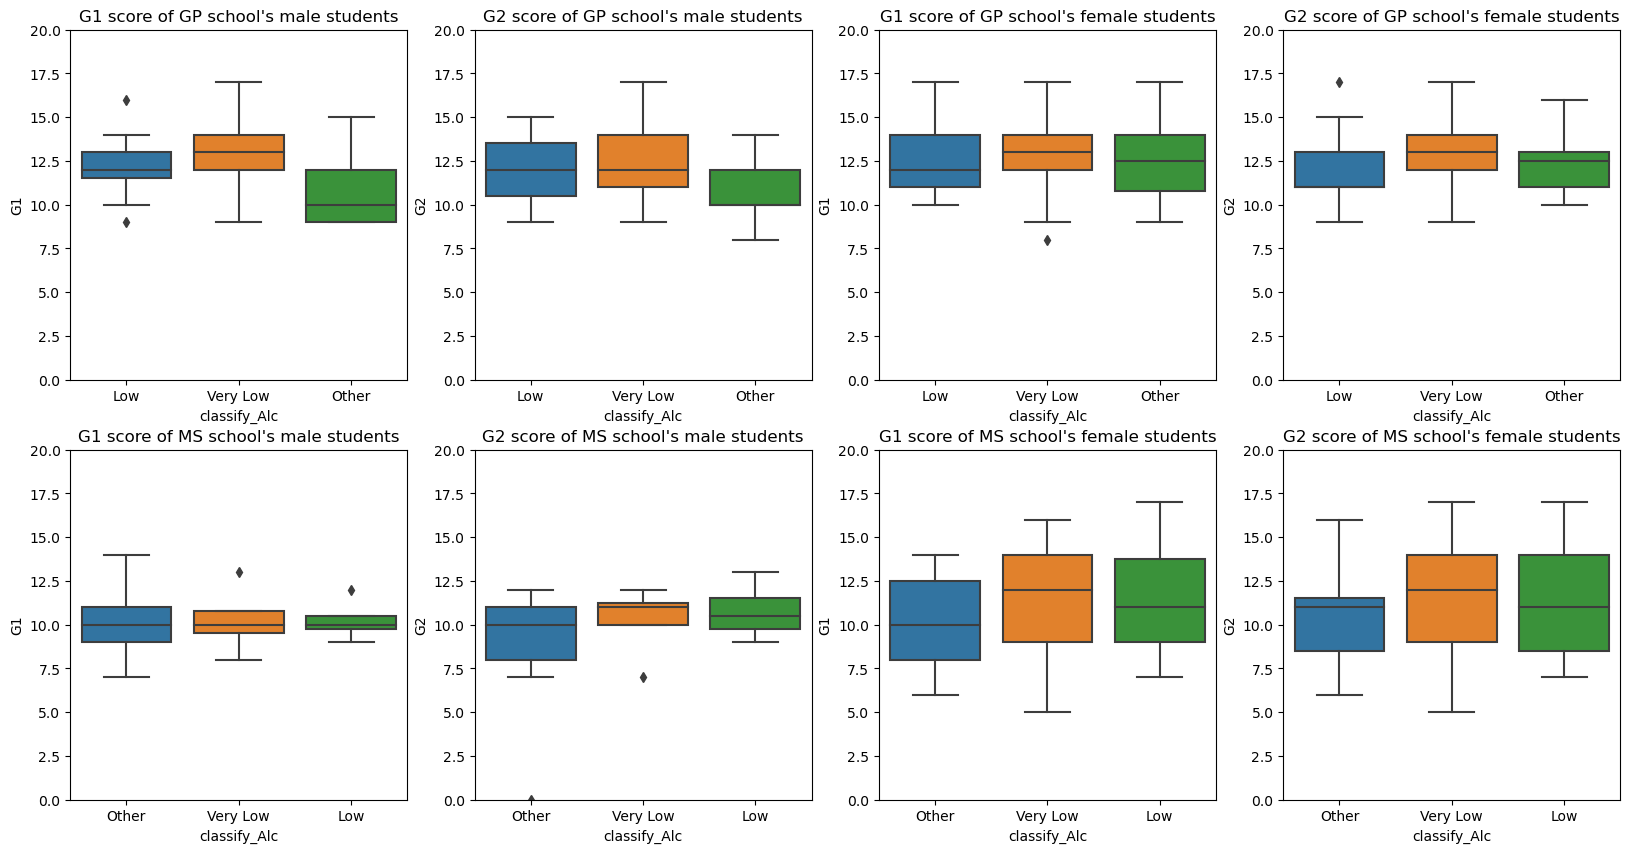

In [61]:
fig, axes = plt.subplots(2, 4, figsize = (20, 10))

sns.boxplot(x = 'classify_Alc', y = 'G1', data = df_GP_M, ax = axes[0, 0])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df_GP_M, ax = axes[0, 1])
sns.boxplot(x = 'classify_Alc', y = 'G1', data = df_GP_F, ax = axes[0, 2])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df_GP_F, ax = axes[0, 3])
axes[0, 0].set_ylim(0, 20)
axes[0, 1].set_ylim(0, 20)
axes[0, 2].set_ylim(0, 20)
axes[0, 3].set_ylim(0, 20)
axes[0, 0].set_title("G1 score of GP school's male students")
axes[0, 1].set_title("G2 score of GP school's male students")
axes[0, 2].set_title("G1 score of GP school's female students")
axes[0, 3].set_title("G2 score of GP school's female students")

sns.boxplot(x = 'classify_Alc', y = 'G1', data = df_MS_M, ax = axes[1, 0])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df_MS_M, ax = axes[1, 1])
sns.boxplot(x = 'classify_Alc', y = 'G1', data = df_MS_F, ax = axes[1, 2])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df_MS_F, ax = axes[1, 3])
axes[1, 0].set_ylim(0, 20)
axes[1, 1].set_ylim(0, 20)
axes[1, 2].set_ylim(0, 20)
axes[1, 3].set_ylim(0, 20)
axes[1, 0].set_title("G1 score of MS school's male students")
axes[1, 1].set_title("G2 score of MS school's male students")
axes[1, 2].set_title("G1 score of MS school's female students")
axes[1, 3].set_title("G2 score of MS school's female students")

Text(0.5, 1.0, "G2 score of GP school's male students")

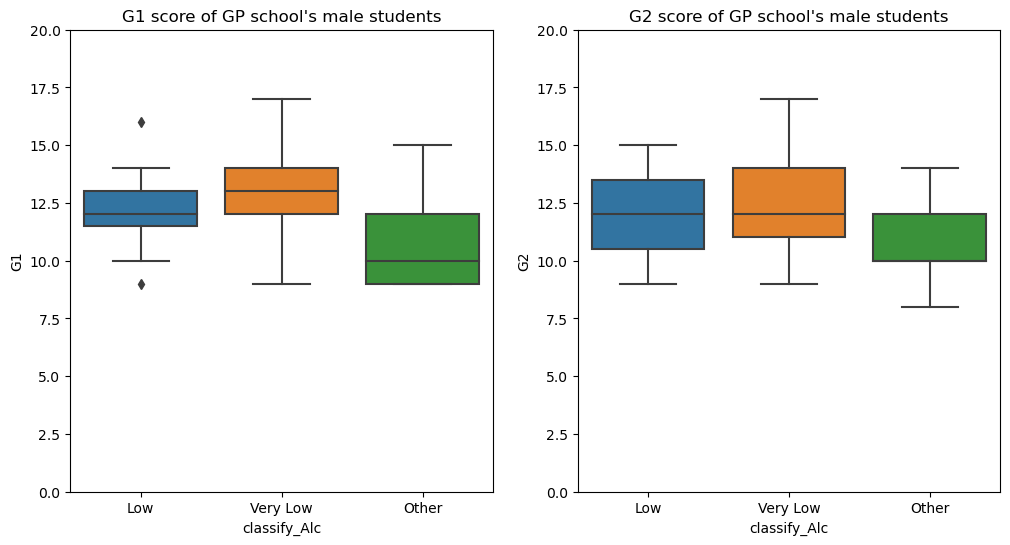

In [53]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(x = 'classify_Alc', y = 'G1', data = df_GP_M, ax = axes[0])
sns.boxplot(x = 'classify_Alc', y = 'G2', data = df_GP_M, ax = axes[1])
axes[0].set_ylim(0, 20)
axes[1].set_ylim(0, 20)
axes[0].set_title("G1 score of GP school's male students")
axes[1].set_title("G2 score of GP school's male students")